ERROR 1: PROJ: proj_create_from_database: Open of /home/jomueller/micromamba/envs/mamba_josh/share/proj failed


(1221, 3662) (1221, 3662)


/tmp/ipykernel_1290909/3751108055.py:100: UserWarning: Legend does not support handles for QuadContourSet instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  ax.legend(legend, legend_labels,


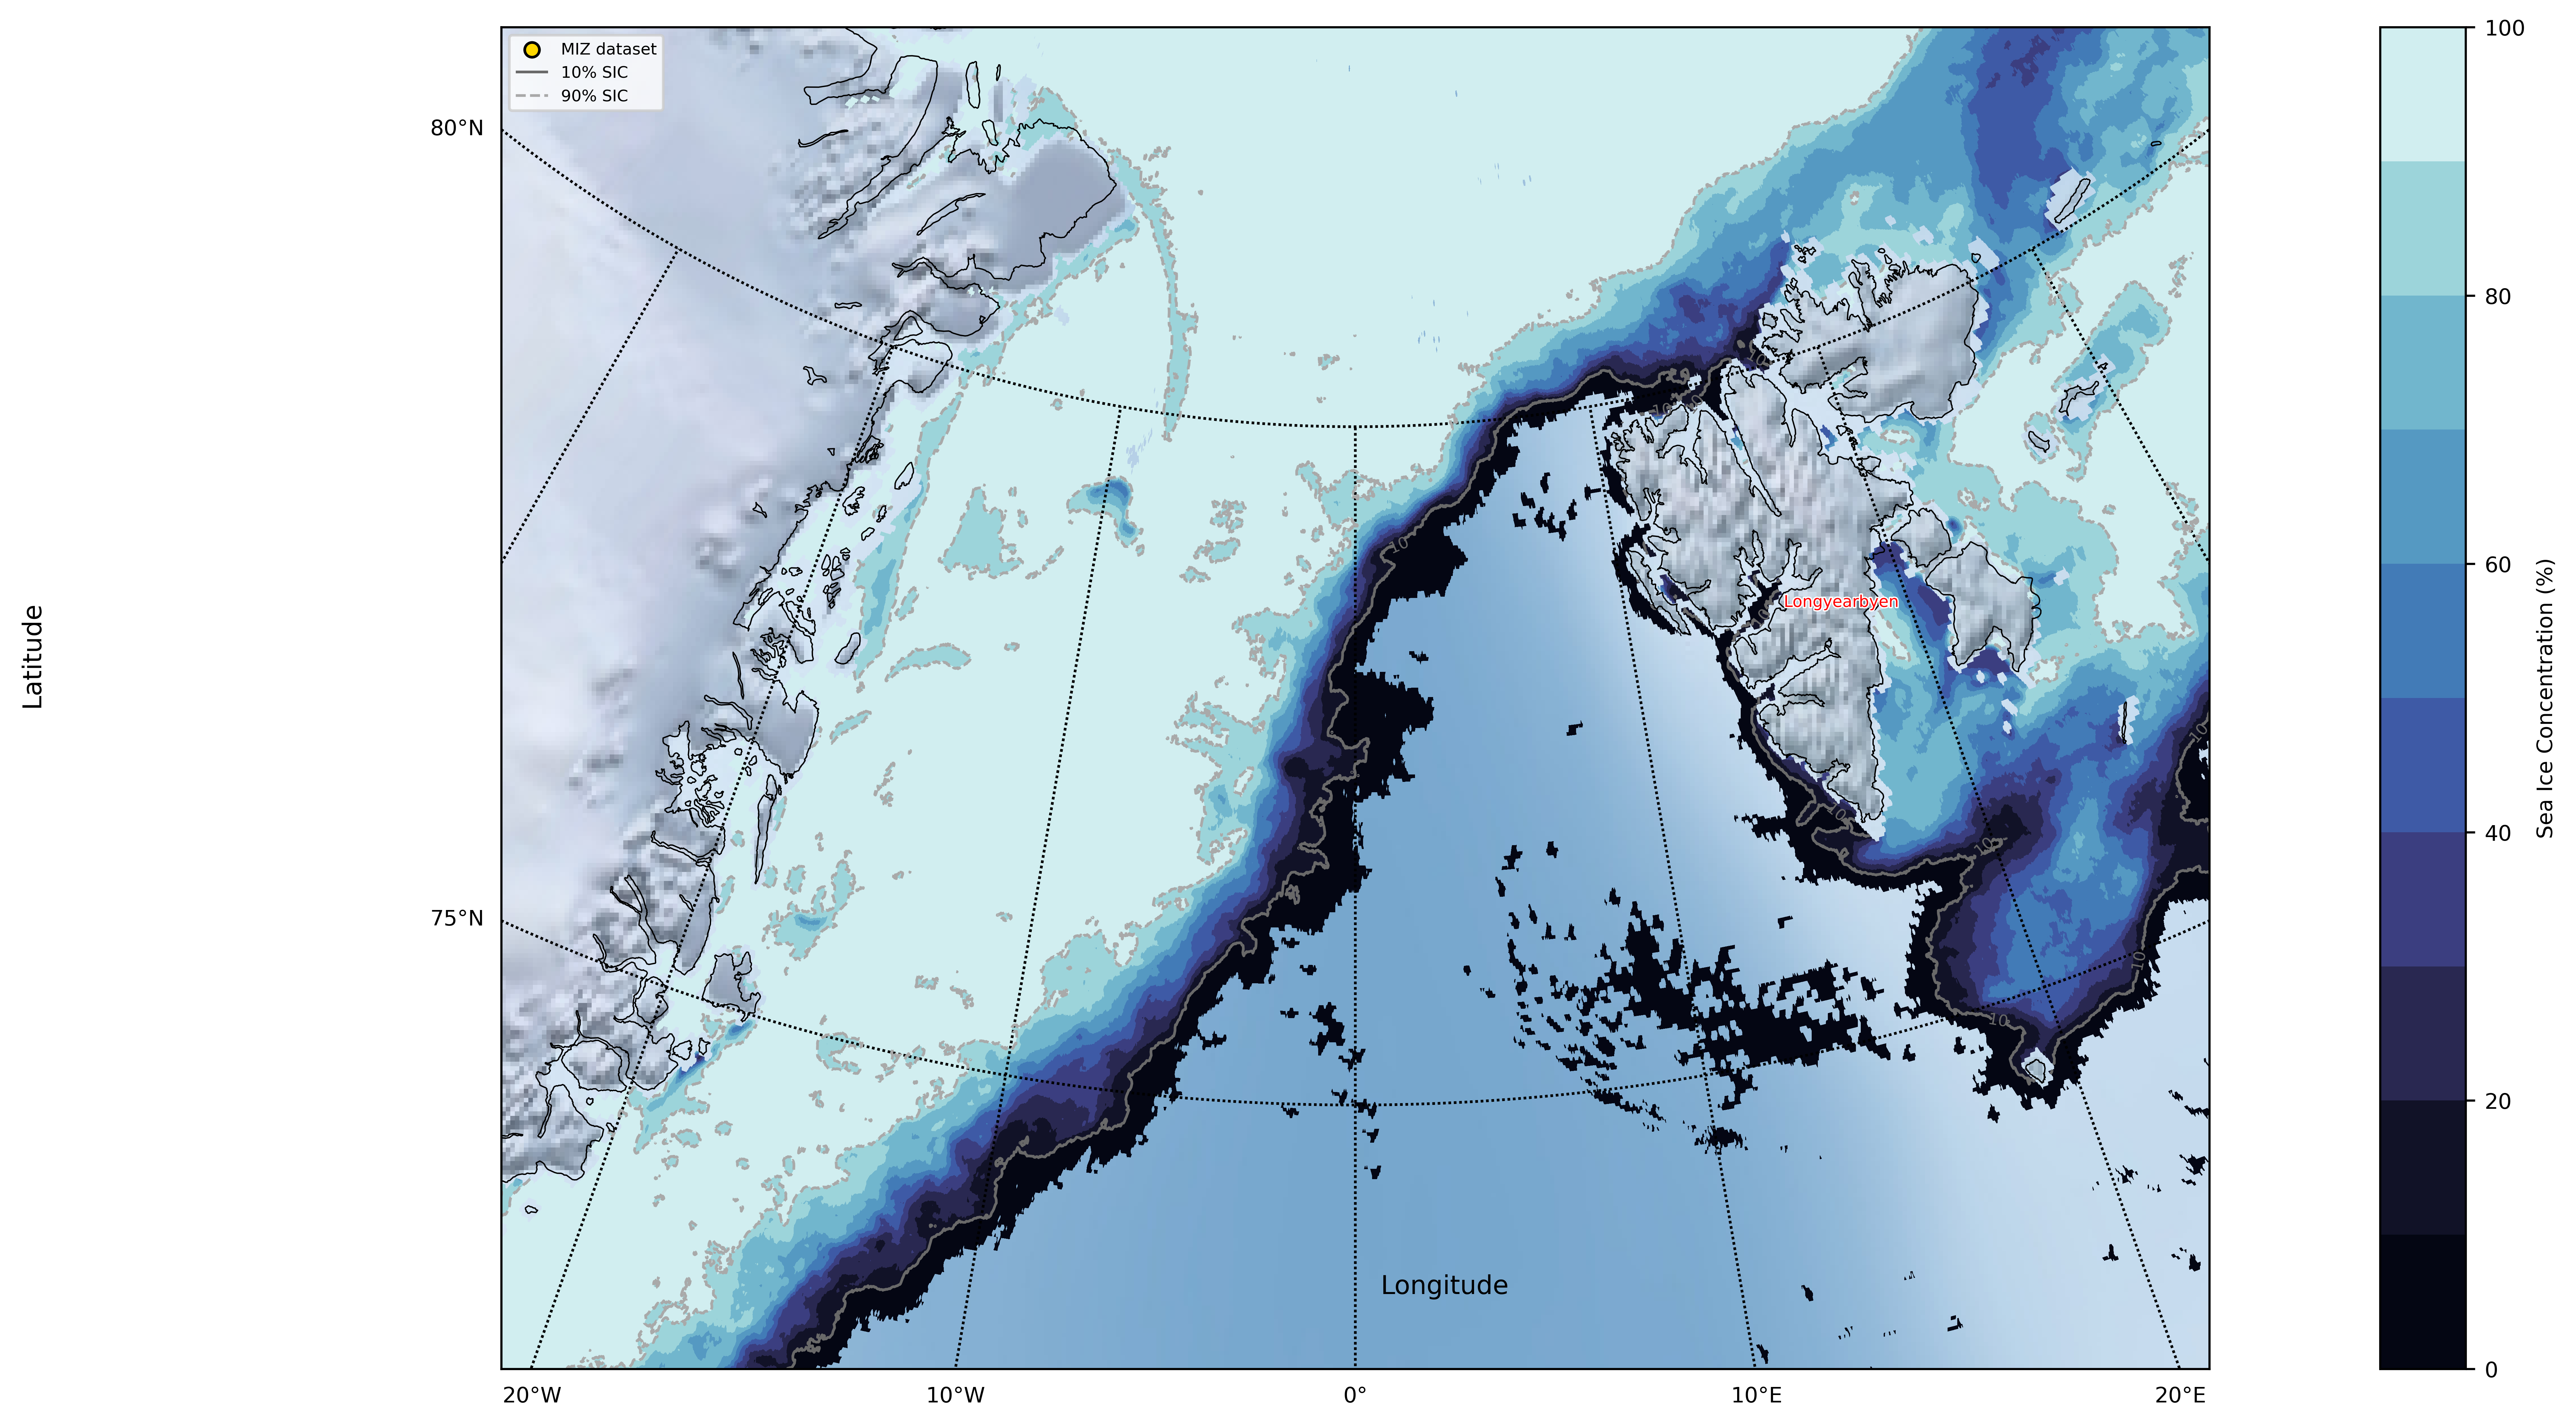

In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmocean

SIC = xr.open_dataset('/projekt_agmwend/home_rad/Joshua/HALO-AC3_unified_data/amsr_modis_sic.nc')
ds = xr.open_dataset('../../data/ar/HALO-AC3_HALO_VELOX_segmentation_statistics_with_sea_ice_edge_distance.nc')
ds_training = xr.open_dataset('../../data/training.nc')

# projection center point
lon0 = 0
lat0 = 78


train_lat = ds_training.lat.values
train_lon = ds_training.lon.values


plt.rcParams['font.size'] = 8

fig, ax = plt.subplots(1, 1, figsize=(16, 9), dpi=600)

m = Basemap(projection='stere', resolution='h',
        lat_0=lat0, lon_0=lon0,  lat_ts=lat0, width=1400000, height=1100000, ax=ax)

m.drawmeridians(np.arange(0, 360, 10), labels=[0,0,0,1])  # left, right, top, bottom
m.drawparallels(np.arange(0, 90, 5), labels=[1,0,0,0])
m.shadedrelief()

X, Y = np.meshgrid(SIC.x.values, SIC.y.values)

X, Y = m(X, Y)  

print(X.shape, Y.shape)

data = SIC.mean(dim='time')['z']
data = data.where((data != 0) & (data < 100))

im = m.contourf(X, Y, data, cmap=cmocean.cm.ice, vmin=10, vmax=100, levels=10, alpha=1,)

cs = m.contour(X, Y, data, levels=[10], colors='dimgray', linewidths=1)
ax.clabel(cs, inline=1, fontsize=6)
handles_10, labels_10 = cs.legend_elements()


cs = m.contour(X, Y, data, levels=[90], colors='darkgray', linewidths=1, linestyles='dashed')
handles_80, labels_80 = cs.legend_elements()
#ax.clabel(cs, inline=1, fontsize=6)

m.drawcoastlines(linewidth=0.5)

lons = ds.segment_lon.values.flatten()
lats = ds.segment_lat.values.flatten()

x, y = m(lons, lats)

#m.scatter(x, y, c=ds.segment_label.values.flatten(), cmap=cmap, norm=norm, s=2, zorder=100)
#im1 = m.scatter(x, y, c='gold', s=1, zorder=1, edgecolor='k', lw=.05)


cbar = m.colorbar(im, location='right', pad="10%", label='Sea Ice Concentration (%)')
cbar.ax.yaxis.set_ticks_position('right')

legend = []

legend.append(ax.scatter([], [], s=30, edgecolor='k', c='gold'),)
legend_labels = ['Open Water', 'Ice Water Mix', 'Thin Ice', 'Snow-Covered','Training data', '10% SIC', '90% SIC', ]
legend_labels = ['MIZ dataset','Training data', '10% SIC', '90% SIC',]

x, y = m(train_lon, train_lat)

#im = m.scatter(x, y, c='violet', s=30, zorder=10, marker='*', edgecolor='k', lw=.1)
legend.append(im)
legend.append(handles_10[0])
legend.append(handles_80[0])



y, x = [78.22300973348118], [15.655859070165498]
x, y = m(x, y)

#m.scatter(x, y, c='r', s=30, zorder=100, marker='*', edgecolor='k', lw=.1)

text = ax.text(x[0]+1, y[0]+0.3, 'Longyearbyen', fontsize=6, color='r', ha='left', va='bottom', transform=ax.transData)
text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='white'), path_effects.Normal()])


ds_tracks = xr.open_dataset('/projekt_agmwend/home_rad/Joshua/HALO-AC3_unified_data/unified_gps_new.nc')
ds_tracks.coarsen(time=100, boundary='trim').mean()

x, y = m(ds_tracks.lon.values, ds_tracks.lat.values)

#im = m.plot(x, y, lw=.1, c='r', alpha=0.75)
#legend.append(im[0])
#legend_labels.append('HALO track')

ax.legend(legend, legend_labels, 
          loc='upper left', 
          fontsize=6,
          frameon=True,
          ).set_zorder(101)

ax.xaxis.set_label_position('bottom')
ax.yaxis.set_label_position('right')


figx = fig.supxlabel('Longitude')
figy = fig.supylabel('Latitude')

figx.set_position([0.5, 0.15])
figy.set_position([0.04, 0.52])

#plt.savefig('../../plots/publish/figure01.png', dpi=300, bbox_inches='tight')
plt.show()


In [50]:
SIC

<xarray.Dataset> Size: 233MB
Dimensions:  (x: 3662, y: 1221, time: 13)
Coordinates:
  * x        (x) float64 29kB -29.99 -29.96 -29.94 -29.91 ... 59.95 59.97 60.0
  * y        (y) float64 10kB 89.99 89.96 89.94 89.91 ... 60.08 60.05 60.03 60.0
  * time     (time) datetime64[ns] 104B 2022-03-21 2022-04-04 ... 2022-04-01
Data variables:
    z        (time, y, x) float32 233MB 101.0 101.0 101.0 101.0 ... nan nan nan

In [2]:
fontsize = 16

plt.rcParams['font.size'] = fontsize
plt.rcParams['axes.labelsize']  = fontsize
plt.rcParams['axes.titlesize']  = fontsize
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['legend.fontsize'] = fontsize
plt.rcParams['legend.title_fontsize'] = fontsize
plt.rcParams['figure.titlesize'] = fontsize
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.axisbelow'] = True


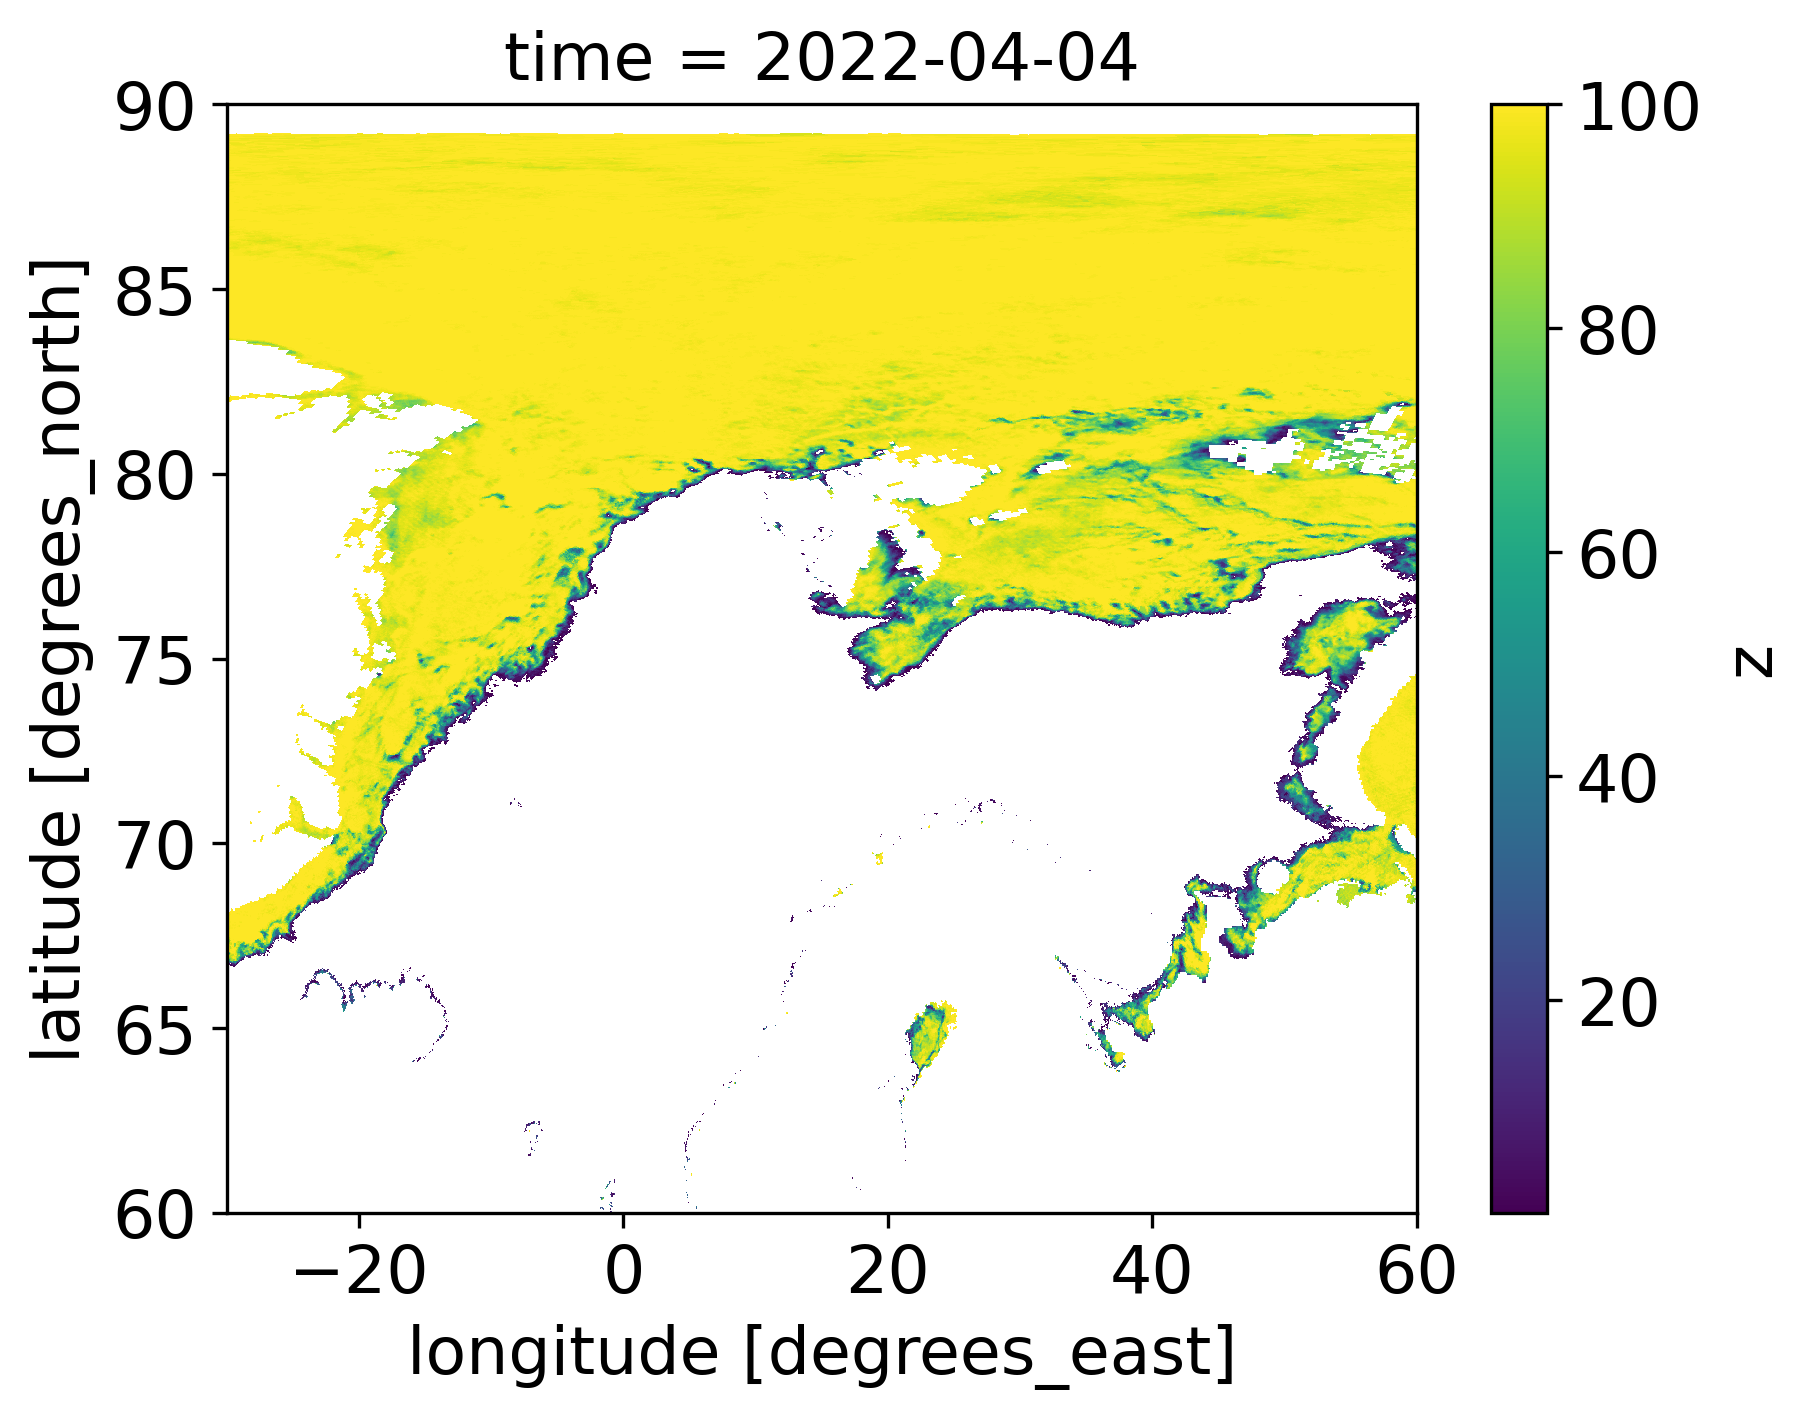

In [17]:
data = SIC.sel(time='2022-04-04')['z']
data = data.where((data != 0) & (data <= 100))
data.plot()

In [18]:
from tqdm import tqdm
ds_worldview = xr.open_dataset('../../data/satellite/snapshot-2022-04-04T00_00_00Z.tif', engine='rasterio')
ds_worldview = ds_worldview.rio.reproject('EPSG:4326')
ds_worldview = ds_worldview.where(ds_worldview['band_data'] < 1e6).dropna('x', how='all').dropna('y', how='all')
ds_worldview['band_normalized'] = (ds_worldview['band_data'] - ds_worldview['band_data'].min()) / (ds_worldview['band_data'].max() - ds_worldview['band_data'].min())
ds_worldview = ds_worldview.transpose('y', 'x', 'band')

data = SIC.sel(time='2022-04-04')['z']
data = data.where((data != 0) & (data <= 100))

count = 0

for alpha in tqdm(np.arange(0, 1.1, 0.1)):
    fig, ax = plt.subplots(1, 1, figsize=(16, 9))

    ds_worldview.band_normalized.plot.imshow(ax=ax)
    data.plot.imshow(ax=ax, cmap=cmocean.cm.ice, vmin=10, vmax=100, alpha=alpha, cbar_kwargs={'label': 'Sea Ice Concentration (%)'})

    ax.set_xlim(-20, 20)
    ax.set_ylim(75, 82)
    ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

    plt.savefig(f'../../plots/2025_GA_Bremen/{count}.png', dpi=450, bbox_inches='tight')
    plt.close()
    count += 1

# fig, ax = plt.subplots(1, 1, figsize=(16, 9), dpi=600)

# ds_worldview.band_normalized.plot.imshow(ax=ax)
# data.plot.imshow(ax=ax, cmap=cmocean.cm.ice, vmin=10, vmax=100, alpha=0.5, cbar_kwargs={'label': 'Sea Ice Concentration (%)'})

# ax.set_xlabel('Longitude (°E)')
# ax.set_ylabel('Latitude (°N)')


# ax.set_xlim(-20, 20)
# ax.set_ylim(75, 82)

  0%|          | 0/11 [00:00<?, ?it/s]/home/jomueller/micromamba/envs/mamba_josh/lib/python3.12/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)
100%|██████████| 11/11 [02:18<00:00, 12.61s/it]


In [8]:
data = SIC.sel(time='2022-04-02')['z'].plot()

KeyError: "not all values found in index 'time'. Try setting the `method` keyword argument (example: method='nearest')."

In [113]:
import rasterio 
import rioxarray

ds_worldview = xr.open_dataset('../../data/satellite/snapshot-2022-04-04T00_00_00Z.tif', engine='rasterio')
#ds_worldview = ds_worldview.rio.set_crs(4326)

### transform to epsg wtg84

ds_worldview = ds_worldview.rio.reproject('EPSG:4326')

ds_worldview = ds_worldview.where(ds_worldview['band_data'] < 1e6).dropna('x', how='all').dropna('y', how='all')
ds_worldview['band_normalized'] = (ds_worldview['band_data'] - ds_worldview['band_data'].min()) / (ds_worldview['band_data'].max() - ds_worldview['band_data'].min())
ds_worldview = ds_worldview.transpose('y', 'x', 'band')
ds_worldview = ds_worldview.coarsen(x=10, y=10, boundary='trim').mean()

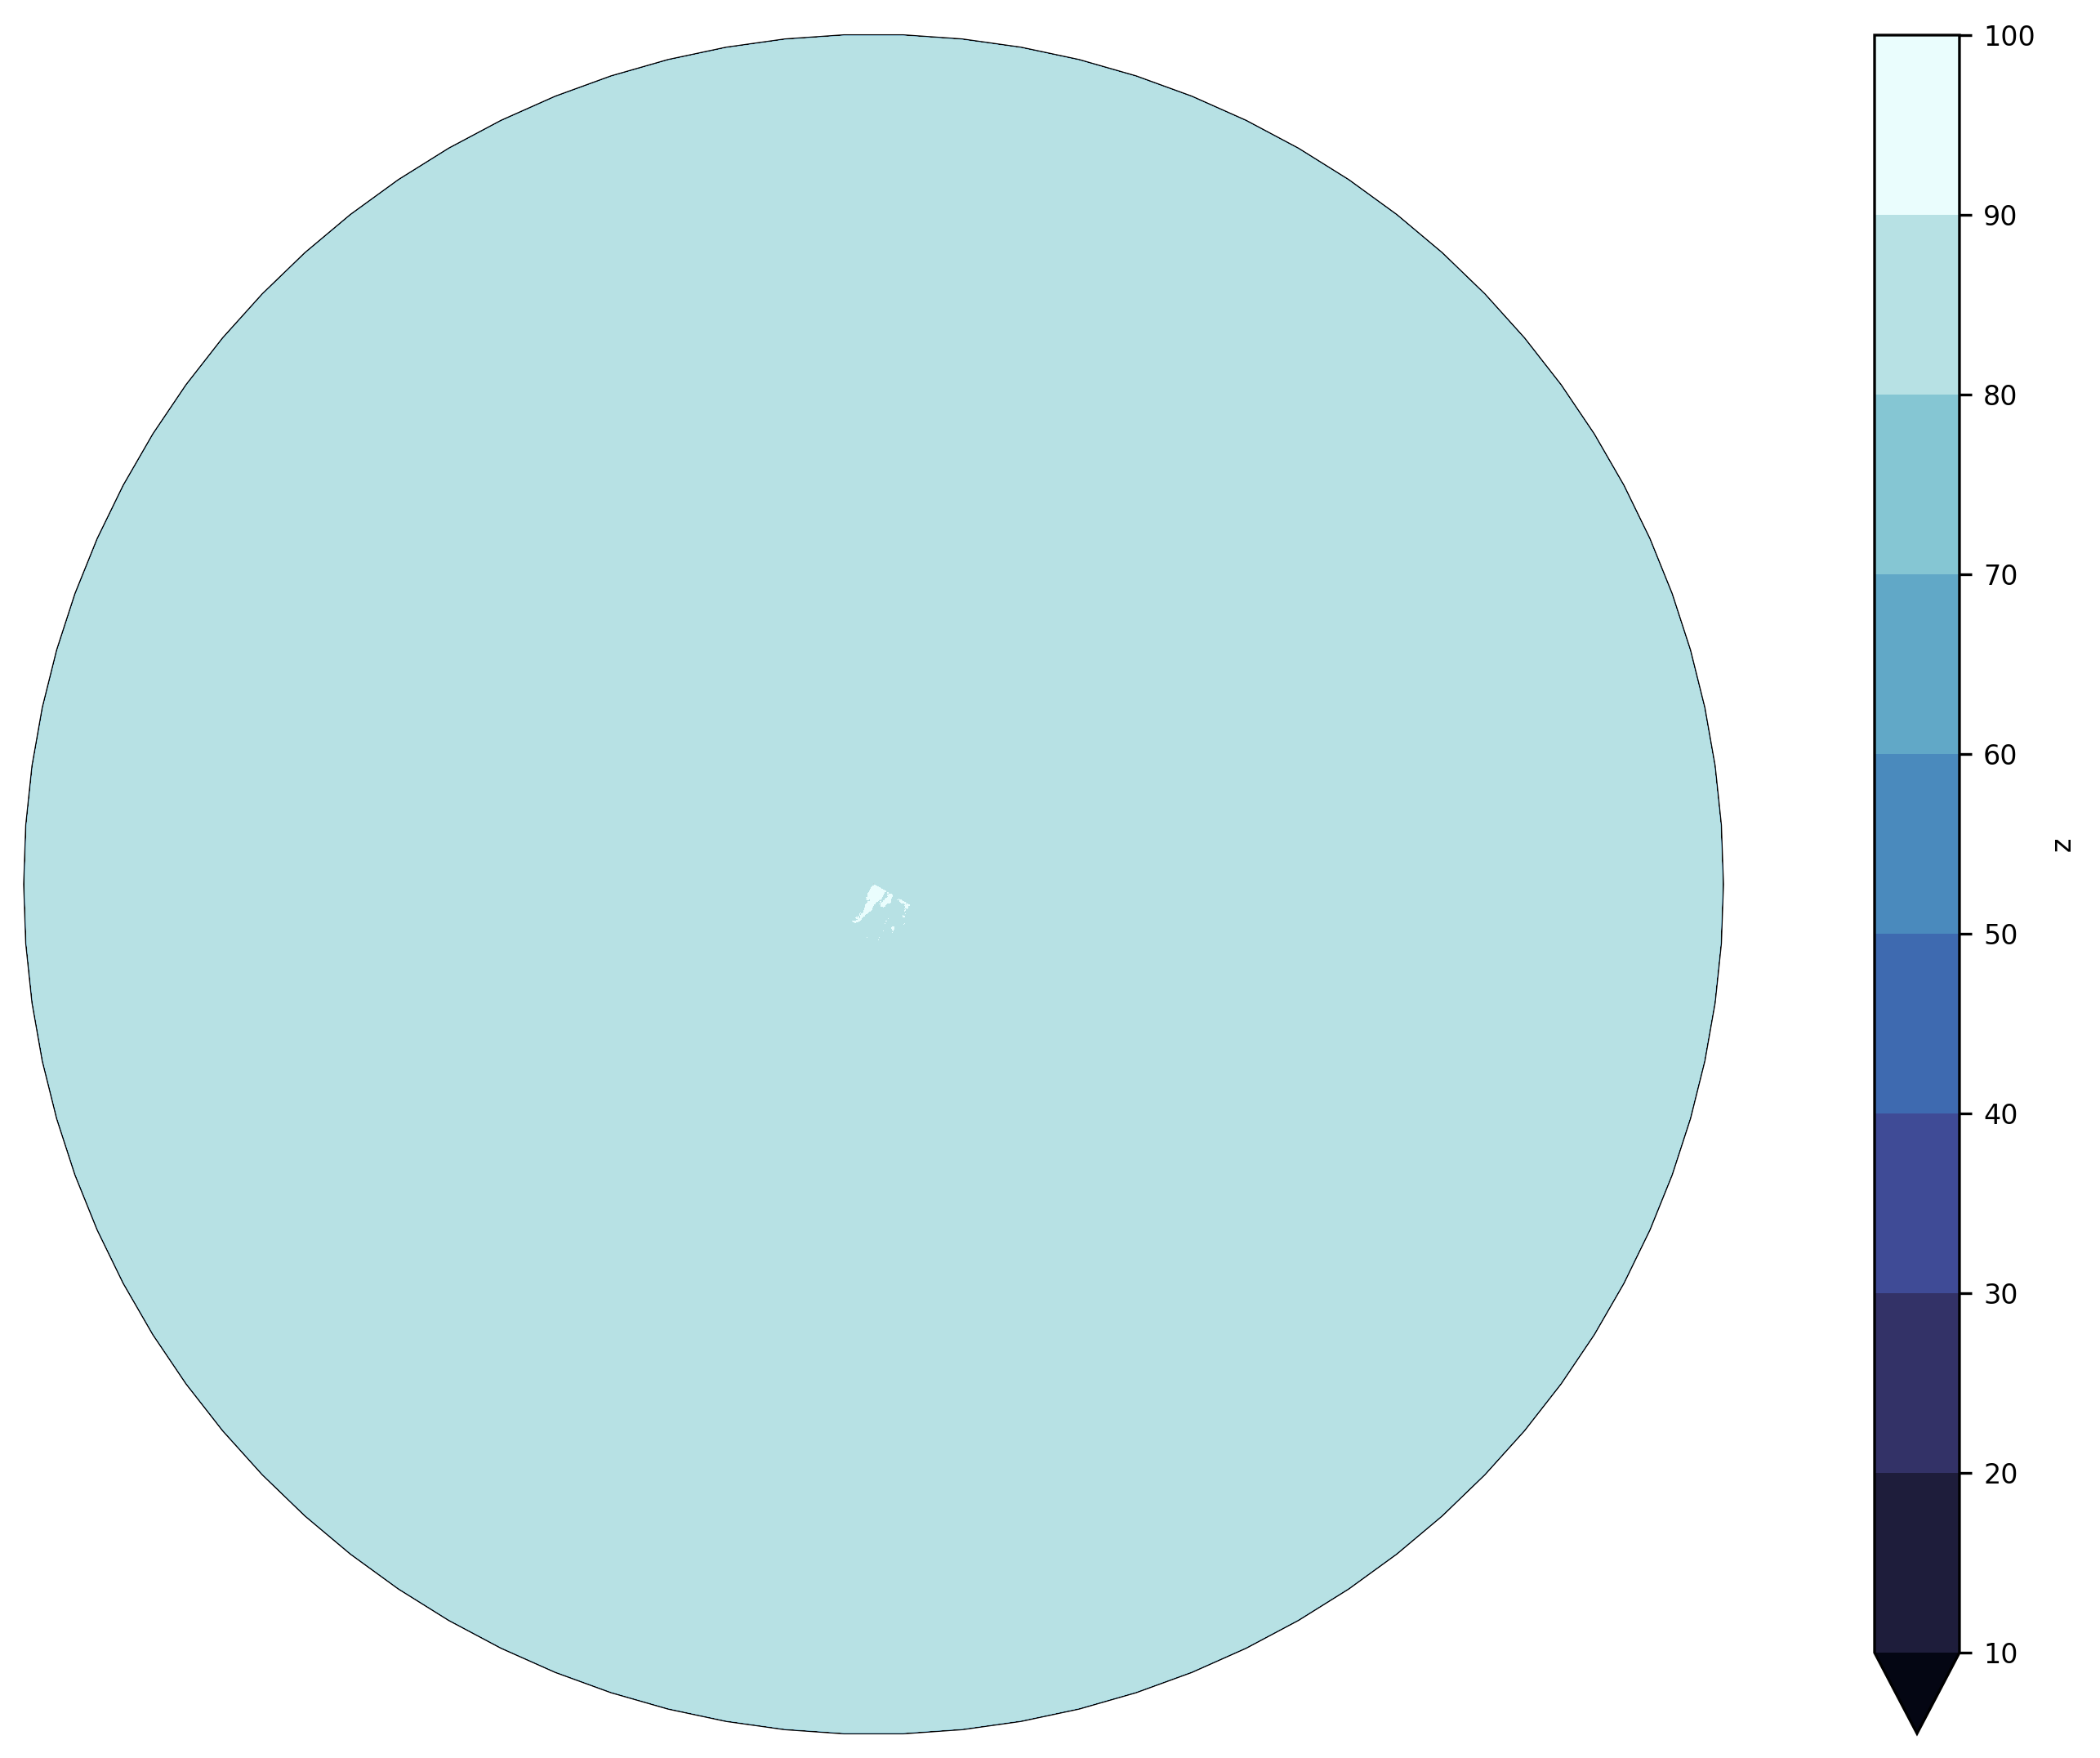

In [115]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9), dpi=300, **{'subplot_kw': {'projection': ccrs.NorthPolarStereo()}})


from cartopy import crs as ccrs



data = SIC.mean(dim='time')['z']
data = data.where((data != 0) & (data < 100))



#im = m.contourf(X, Y, data, cmap=cmocean.cm.ice, vmin=10, vmax=100, levels=10, alpha=1,)

#cs = m.contour(X, Y, data, levels=[10], colors='dimgray', linewidths=1)
ax.clabel(cs, inline=1, fontsize=6)
handles_10, labels_10 = cs.legend_elements()


ds_worldview.band_normalized.plot.imshow(alpha=.5, ax=ax, zorder=100)

data.plot.contourf(ax=ax, cmap=cmocean.cm.ice, vmin=10, vmax=100, levels=10, alpha=1, zorder=10, transform=ccrs.PlateCarree())



In [75]:
ds_worldview['band_normalized'] = (ds_worldview['band_data'] - ds_worldview['band_data'].min()) / (ds_worldview['band_data'].max() - ds_worldview['band_data'].min())

AttributeError: 'Basemap' object has no attribute 'set_xlabel'

/home/jomueller/micromamba/envs/mamba_josh/lib/python3.12/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


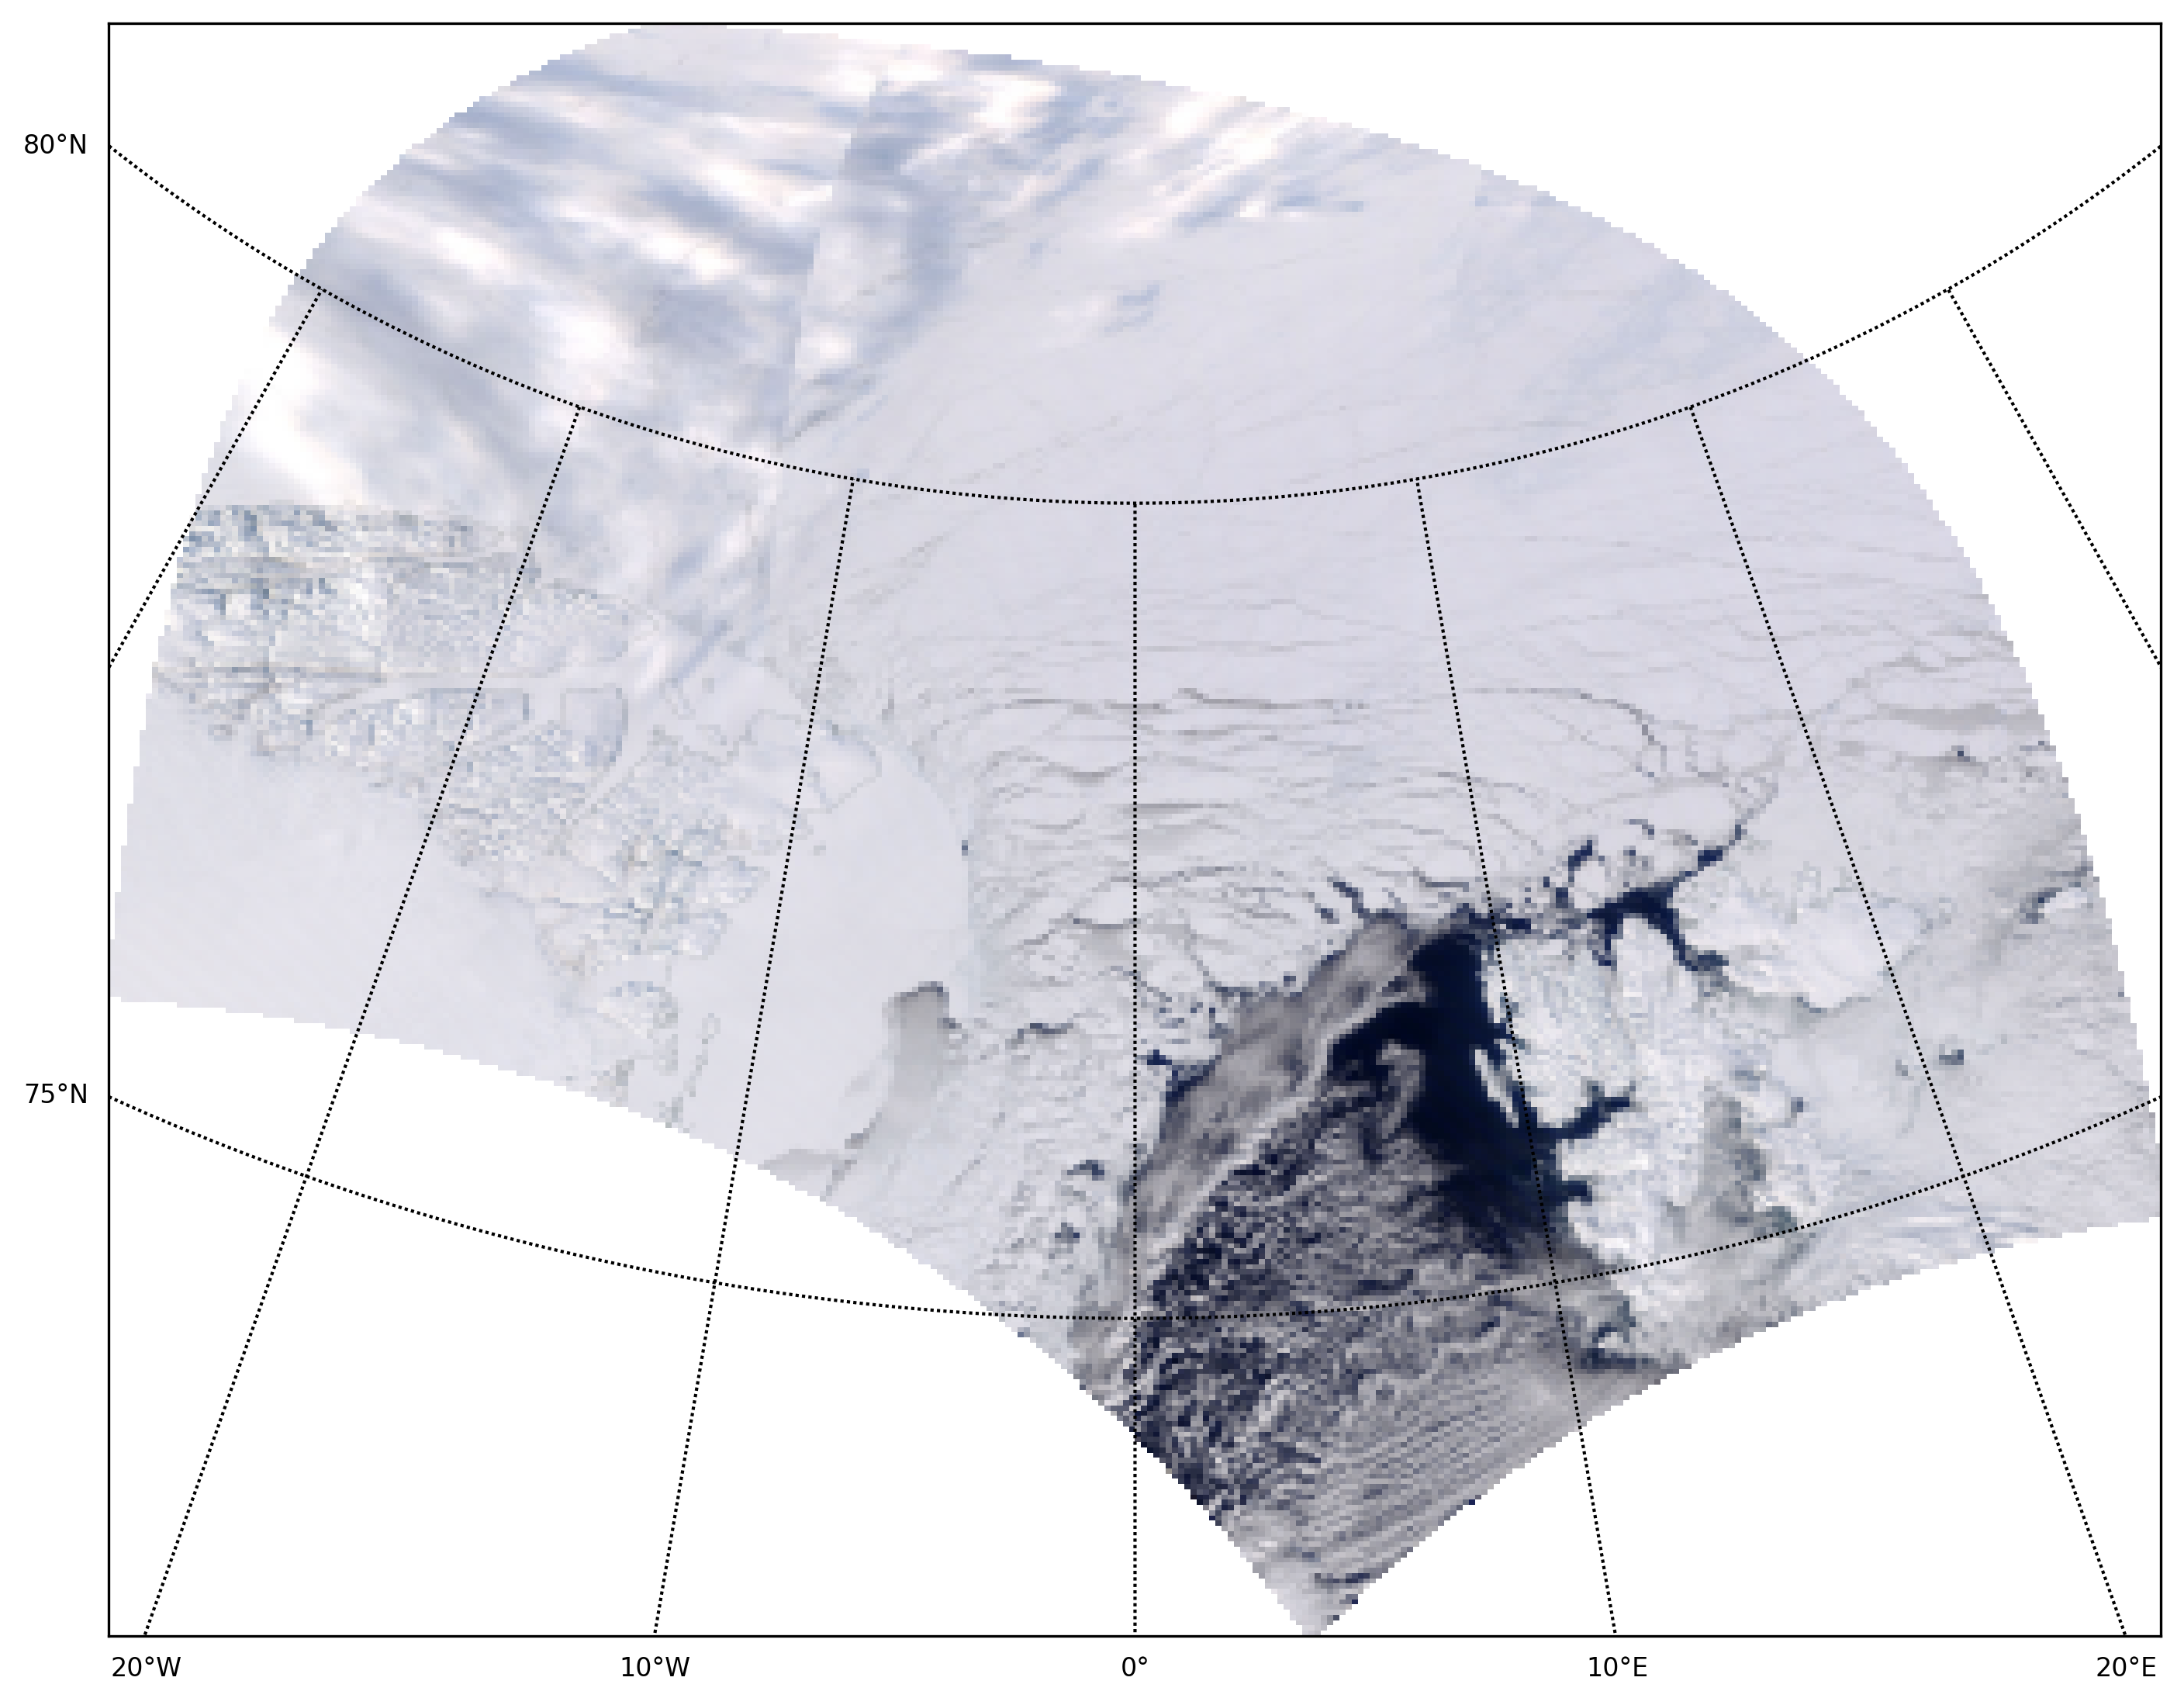

In [77]:

fig, ax = plt.subplots(1, 1, figsize=(16, 9), dpi=300)
m = Basemap(projection='stere', resolution='h',
        lat_0=lat0, lon_0=lon0,  lat_ts=lat0, width=1400000, height=1100000, ax=ax)

m.drawmeridians(np.arange(0, 360, 10), labels=[0,0,0,1])  # left, right, top, bottom
m.drawparallels(np.arange(0, 90, 5), labels=[1,0,0,0])

X, Y = np.meshgrid(ds_worldview.x.values, ds_worldview.y.values)

X, Y = m(X, Y)

ds_worldview['band_normalized'].plot.imshow(ax=m)

In [ ]:
ds